In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import os 
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import datetime
from data_loader import Diamond
from DeepRegress import RegressNet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
val_csv = 'val_pca.csv'
parent_dir = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
root_dir = os.path.join(parent_dir,'datasets')
save_dir = os.path.join(os.getcwd(),'training_checkpoints')

In [9]:
val_file = pd.read_csv(os.path.join(root_dir,'val_pca.csv'))
y_val = val_file['price']


In [11]:
epochs = 200
trial_file = '20190920-103129_{}.pth'.format(epochs)
model_path = os.path.join(save_dir, trial_file)
batch_size = 4
val = Diamond(csv_file=val_csv,root_dir=root_dir)
valload = DataLoader(val, batch_size=batch_size//4, shuffle=False)
model = RegressNet(6,100,1)
state_dict = torch.load(model_path)
model.load_state_dict(state_dict['model'])
model.eval()
targ = []
output = []
error = []
v_running_loss = 0.0
with torch.no_grad():
    for test in tqdm(valload):
        feature = test['feature']
        target = test['target']
        out = model(feature)    
        targ.append(target)
        output.append(out)
        error.append(out-target)
        v_loss = np.square(out.numpy(),target.numpy())
        v_running_loss += v_loss

r2 = r2_score(y_val, output) 
mse = mean_squared_error(y_val, output)
rmse = np.sqrt(mse)

print('r2 score:{}, rmse:{}'.format(r2,rmse))

100%|██████████████████████████████████████████████████████████████████████████| 10788/10788 [00:04<00:00, 2213.81it/s]


r2 score:0.9275639475353319, rmse:0.2681357009965835


In [13]:
epochs = 100
trial_file = '20190920-103129_{}.pth'.format(epochs)
model_path = os.path.join(save_dir, trial_file)
batch_size = 4
val = Diamond(csv_file=val_csv,root_dir=root_dir)
valload = DataLoader(val, batch_size=batch_size//4, shuffle=False)
model = RegressNet(6,100,1)
state_dict = torch.load(model_path)
model.load_state_dict(state_dict['model'])
model.eval()
targ = []
output = []
error = []
v_running_loss = 0.0
with torch.no_grad():
    for test in tqdm(valload):
        feature = test['feature']
        target = test['target']
        out = model(feature)    
        targ.append(target)
        output.append(out)
        error.append(out-target)
        v_loss = np.square(out.numpy(),target.numpy())
        v_running_loss += v_loss

r2 = r2_score(y_val, output) 
mse = mean_squared_error(y_val, output)
rmse = np.sqrt(mse)

print('r2 score:{}, rmse:{}'.format(r2,rmse))

100%|██████████████████████████████████████████████████████████████████████████| 10788/10788 [00:04<00:00, 2218.22it/s]


r2 score:0.8985200401071707, rmse:0.3173711154355602


C:\Users\Rajeev\Anaconda3\envs\development\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


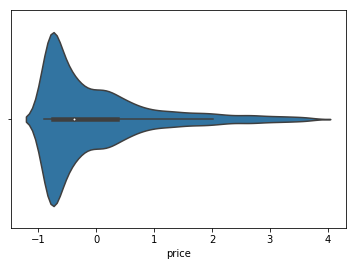

In [12]:
sns.violinplot(y_val)

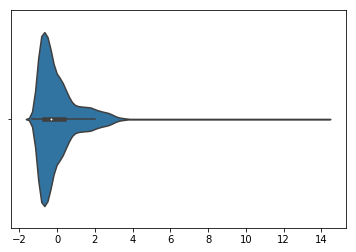

In [16]:
sns.violinplot(np.array(output))

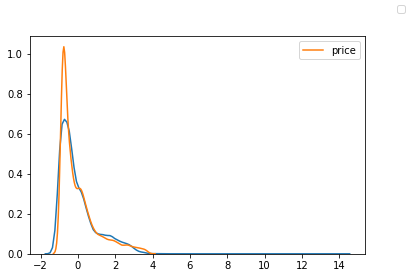

<Figure size 1152x1152 with 0 Axes>

In [17]:
fig, ax = plt.subplots()
fig.legend('on')
plt.figure(figsize=(16,16))
sns.kdeplot(np.array(output), ax=ax)
sns.kdeplot(y_val, ax=ax)